   age     bmi      charges  sex_male  smoker_yes  region_northwest  \
0   63  23.085  14451.83515     False       False             False   
1   55  32.775  12268.63225     False       False              True   
2   23  17.385   2775.19215      True       False              True   
3   31  36.300  38711.00000      True        True             False   
4   22  35.600  35585.57600      True        True             False   

   region_southeast  region_southwest  
0             False             False  
1             False             False  
2             False             False  
3             False              True  
4             False              True  


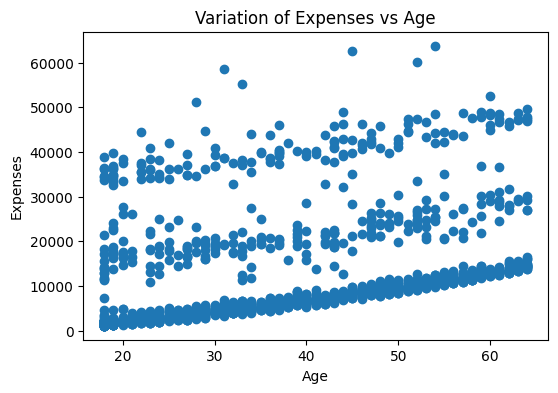

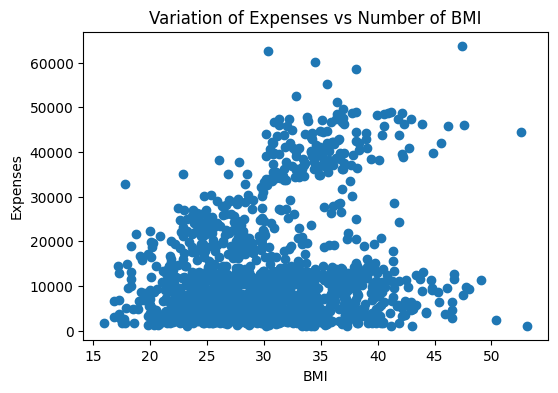

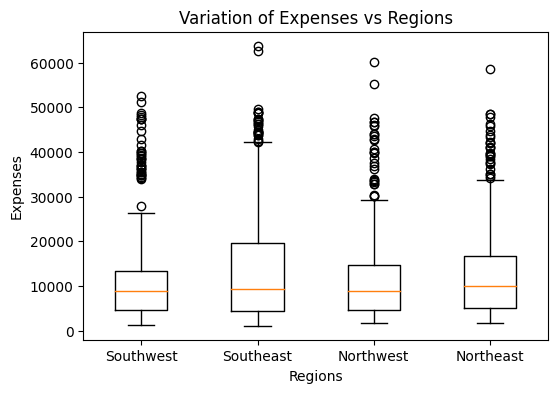

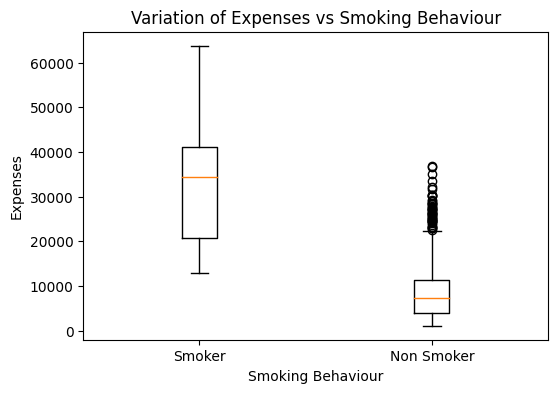

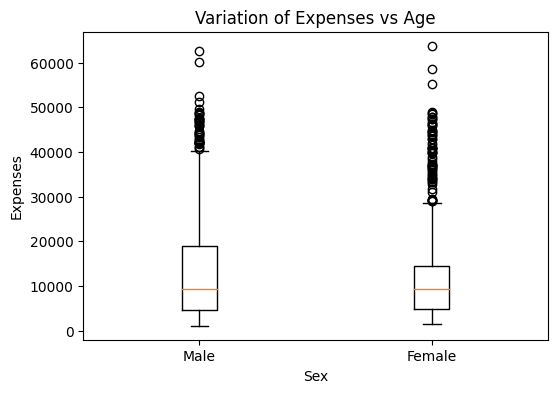

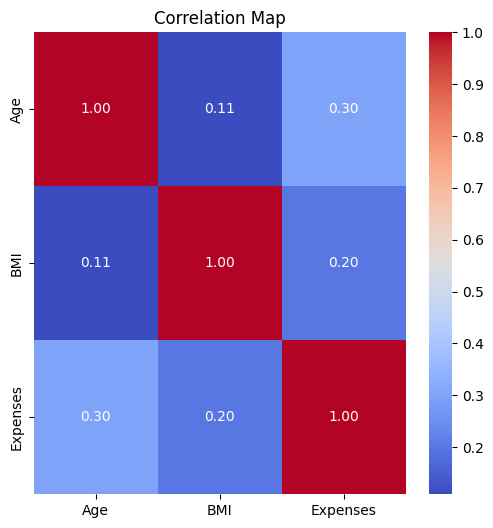

*************** Summary ***************

The Model is -

charges = age + bmi + sex_male + smoker_yes + region_northwest + region_southeast + region_southwest

SSE of the given Model: 49277079458.27 

SSR of the given Model: 146797142110.1 

TSS of the given Model: 196074221568.37 

Adjusted R2 for the given Model: 0.75 

"S" is: 37050435.68 

MSR of the given Model: 20971020301.44 

"MSE of the given Model": 37050435.68
"The F stat for the Model Fit:": 566.01

Beta estimates-



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from scipy.stats import f
from scipy.stats import norm
import math

# Load and preprocess data
data = pd.read_csv("final.csv")
data_encoded = pd.get_dummies(data[["sex", "smoker", "region"]], drop_first=True)
numerical_data = data.drop(["sex", "smoker", "region"], axis=1)
processed_data = pd.concat([numerical_data, data_encoded], axis=1)
print(processed_data.head())


# Visualize data
plt.figure(figsize=(6, 4))
plt.title("Variation of Expenses vs Age")
plt.scatter(numerical_data.iloc[:, 0], numerical_data.iloc[:, 2])
plt.ylabel("Expenses")
plt.xlabel("Age")
plt.show()

plt.figure(figsize=(6, 4))
plt.title("Variation of Expenses vs Number of BMI")
plt.scatter(numerical_data.iloc[:, 1], numerical_data.iloc[:, 2])
plt.ylabel("Expenses")
plt.xlabel("BMI")
plt.show()

plt.figure(figsize=(6, 4))
plt.title("Variation of Expenses vs Regions")
plt.boxplot([data[data["region"]=="southwest"]["charges"].values,
             data[data["region"]=="southeast"]["charges"].values,
             data[data["region"]=="northwest"]["charges"].values,
             data[data["region"]=="northeast"]["charges"].values],
             labels=["Southwest", "Southeast", "Northwest", "Northeast"])
plt.ylabel("Expenses")
plt.xlabel("Regions")
plt.show()

plt.figure(figsize=(6, 4))
plt.title("Variation of Expenses vs Smoking Behaviour")
plt.boxplot([data[data["smoker"] == "yes"]["charges"].values,
            data[data["smoker"] == "no"]["charges"].values],
            labels=["Smoker","Non Smoker"])
plt.ylabel("Expenses")
plt.xlabel("Smoking Behaviour")
plt.show()

plt.figure(figsize=(6, 4))
plt.title("Variation of Expenses vs Age")
plt.boxplot([data[data["sex"]=="male"]["charges"].values,
             data[data["sex"]=="female"]["charges"].values],
             labels=["Male", "Female"])
plt.ylabel("Expenses")
plt.xlabel("Sex")
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(data[["age", "bmi", "charges"]].corr().values, annot=True,
            fmt=".2f", cmap="coolwarm",
            xticklabels=["Age", "BMI", "Expenses"],
            yticklabels=["Age", "BMI", "Expenses"])
plt.title("Correlation Map")
plt.show()

#visualize_data(processed_data['age'], processed_data['expenses'], "Age", "Expenses", "Variation of Expenses vs Age")
#visualize_data(processed_data['bmi'], processed_data['expenses'], "BMI", "Expenses", "Variation of Expenses vs BMI")

# Linear regression analysis
predictor_columns = ['age', 'bmi', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
target_variable = processed_data. columns [2]
X = np.concatenate([np.ones((processed_data.shape[0], 1)), processed_data[predictor_columns].values], axis=1)
y = processed_data[target_variable].values

# Set significance level and define prediction point
alpha = 0.05
x0 = np.concatenate([[1], processed_data.iloc[450, 1:].values])
t_right = t.ppf(q=1-alpha/2, df=X.shape[0]-X.shape[1])
t_left = t.ppf(q=alpha/2, df=X.shape[0]-X.shape[1])
f_right = f.ppf(q=1-alpha, dfn=X.shape[1]-1, dfd=X.shape[0]-X.shape[1])

# Model fitting
C = np.linalg.inv(np.dot(np.transpose(X.astype(float)), X.astype(float)))
Px = np.dot(np.dot(X, C), np. transpose(X) )
beta = np.dot(C, np.dot(np.transpose(X), y) )
y_pred = np.dot(X, beta)


#C = np.linalg.inv(X.T @ X)
#beta = C @ X.T @ y
#y_pred = X @ beta
residuals = y - y_pred
error_variance = np.sum(residuals**2) / (X.shape[0] - X.shape[1])


t_values = beta / np.sqrt(np.diag(C) * error_variance)
#beta_confidence_intervals = np.zeros((beta. shape[0], 2), dtype=np. float32)
#for j in range(0, beta.shape[0]):
 #   beta - t_right * np.sqrt(np.diag(C) * error_variance),
  #  beta - t_left * np.sqrt(np.diag(C) * error_variance)
for i in range(0,beta.shape[0]):
  t_values[i]=beta[i]/np.sqrt(error_variance*C[i, i])

beta_confidence_intervals = np.zeros((beta. shape[0], 2), dtype=np. float32)
for j in range(0, beta.shape[0]):
    beta_confidence_intervals[j, 0] = beta[j] - t_right*np.sqrt(error_variance*C[j, j])
    beta_confidence_intervals[j, 1] = beta[j] - t_left*np.sqrt(error_variance*C[j, j])

# Print summary
print("*************** " + "Summary" + " ***************\n")
print("The Model is -\n")
print(target_variable + " = " + " + ".join(predictor_columns) + "\n")
print("SSE of the given Model:", round(np.sum(residuals**2), 2), "\n")
print("SSR of the given Model:", round(np.sum((y_pred - np.mean(y))**2), 2), "\n")
print("TSS of the given Model:", round(np.sum((y - np.mean(y))**2), 2), "\n")
print("Adjusted R2 for the given Model:", round(1 - (np.sum(residuals**2) / np.sum((y - np.mean(y))**2)), 2), "\n")
print("\"S\" is:", round(error_variance, 2), "\n")
print("MSR of the given Model:", round(np.sum((y_pred - np.mean(y))**2) / (X.shape[1] - 1), 2), "\n")
print("\"MSE of the given Model\":", round(np.sum(residuals**2) / (X.shape[0] - X.shape[1]), 2))
print("\"The F stat for the Model Fit:\":", round((np.sum((y_pred - np.mean(y))**2) / (X.shape[1] - 1)) / (np.sum(residuals**2) / (X.shape[0] - X.shape[1])), 2))
print("===========================\n")
print("Beta estimates-\n")
beta_heading = list()
for i in range(0, beta.shape[0]):
    beta_heading.append(str("beta")+str(i))
X_nn = X.astype(float)
dict1 ={
    "Coefficients":beta_heading,
    "Beta Est.":beta,
    "t-stat":t_values,
    "p-values":2 * t.pdf(t_values.astype(float), df =float(X_nn.shape[0]-X_nn.shape[1])),
    "Lower Conf":beta_confidence_intervals.T[0],
    "Upper Conf":beta_confidence_intervals.T[1]
}


# # Residual plot
# plt.scatter(y_pred, residuals)
# plt.plot([min(y_pred), max(y_pred) + 2], [0, 0], color="g")
# plt.xlabel("Predicted Values")
# plt.ylabel("Error")
# plt.title("Residual Plot with Predicted Values")
# plt.show()

# Studentized error analysis
stand_res = np.zeros(X.shape[0], dtype=np. float32)
for i in range(0, X.shape[0]):
    stand_res[i] = residuals[i]/np. sqrt(error_variance*(1-Px[i, i]))

In = np.eye(Px.shape[0])
SSE = np.dot (np. transpose(y), np.dot(In-Px, y) )
te_values= np. zeros(X. shape[0], dtype=np. float32)
for i in range(0, X.shape[0]):
    sigma_2i = (SSE-np.square(residuals[i])/(1-Px[i, i]) )*(1/(X. shape[0]-X. shape[1]))
    te_values[i] = residuals[i]/np. sqrt(sigma_2i*(1-Px[i, i]))




# # Outlier detection
# plt.scatter(te_values[(te_values < t_left) & (te_values > t_right)],
#             np.zeros_like(te_values[(te_values < t_left) & (te_values > t_right)]),
#             color="r", label="Outliers")
# plt.scatter(te_values[(te_values >= t_left) & (te_values <= t_right)],
#             np.zeros_like(te_values[(te_values >= t_left) & (te_values <= t_right)]),
#             color="g", label="Inliers")
# plt.plot(np.linspace(np.min(te_values), np.max(te_values), 100), norm.pdf(np.linspace(np.min(te_values), np.max(te_values), 100)))
# plt.ylabel('Probability')
# plt.title('Studentized Errors for outlier detection')
# plt.autoscale(axis='x', tight=True)
# plt.show()

# # Lasso and Ridge regression
# X_n = processed_data.drop(target_variable, axis=1).values
# X_n = np.concatenate((np.ones((X_n.shape[0], 1)), X_n), axis=1)
# y_n = processed_data[target_variable].values
# Lasso_prediction_model = Lasso()
# Ridge_prediction_model = Ridge()
# Lasso_prediction_model.fit(X_n, y_n)
# Ridge_prediction_model.fit(X_n, y_n)

In [ ]:
for i in dict1.keys():
  print(i, end = '\t\t\t')
print('')
for i in range(len(beta_heading)):
  for k in dict1.keys():
    print(dict1[k][i], end = '\t\t\t')
  print('')

Coefficients			Beta Est.			t-stat			p-values			Lower Conf			Upper Conf			
beta0			-11556.95734444149			-11.725497432332752			2.950506445042563e-29			-13490.509			-9623.406			
beta1			258.5396974787279			21.6577933176245			3.9106158925999986e-88			235.12134			281.95807			
beta2			340.45918117307343			11.856851590760616			7.251979625465927e-30			284.12927			396.7891			
beta3			-111.5700133351816			-0.33378372953985447			0.7544813942034011			-767.30115			544.16113			
beta4			23862.90634161193			57.525542550674245			0.0			23049.129			24676.686			
beta5			-304.1035863209763			-0.6361824257989838			0.6515085831030551			-1241.8456			633.6384			
beta6			-1039.2021014023685			-2.162079444609184			0.07723291973348773			-1982.1156			-96.28858			
beta7			-916.4414261938437			-1.910364206981476			0.12878690066328072			-1857.5333			24.65047			


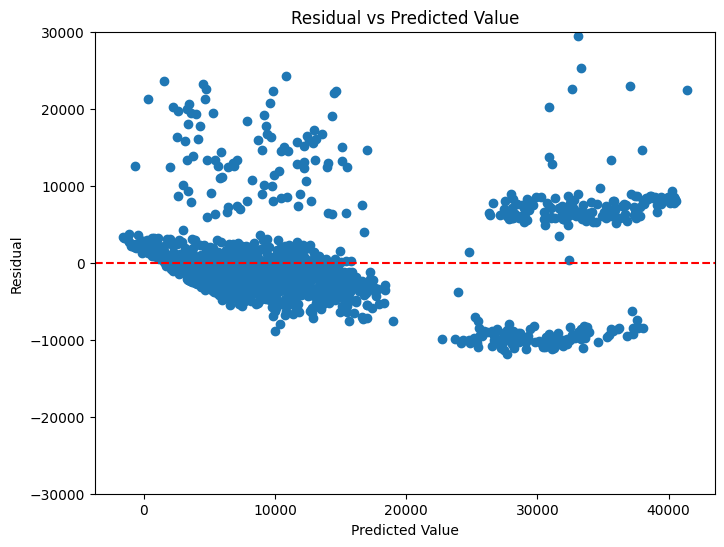

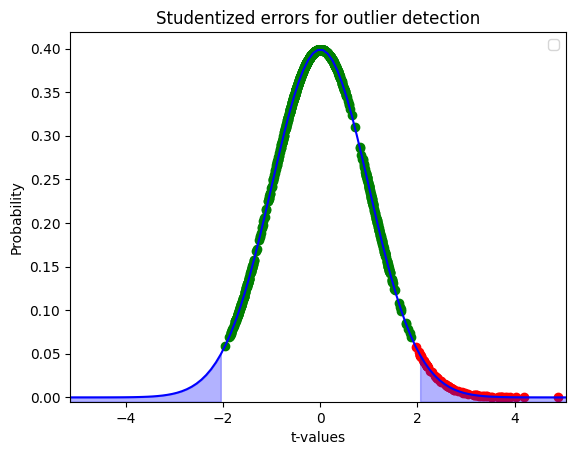

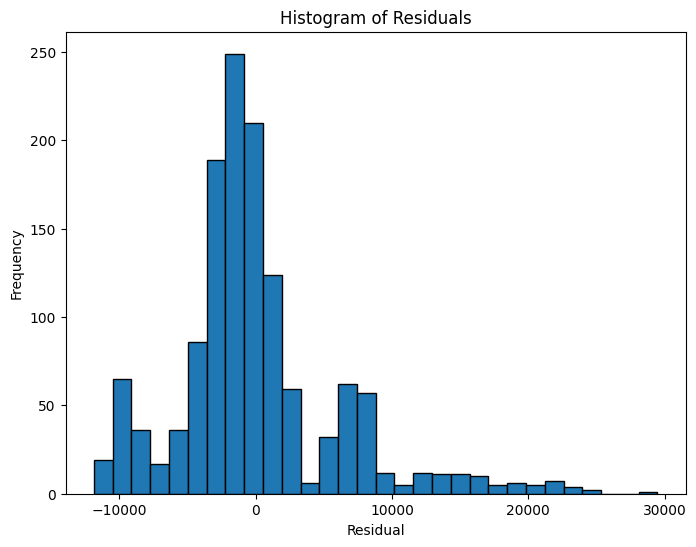

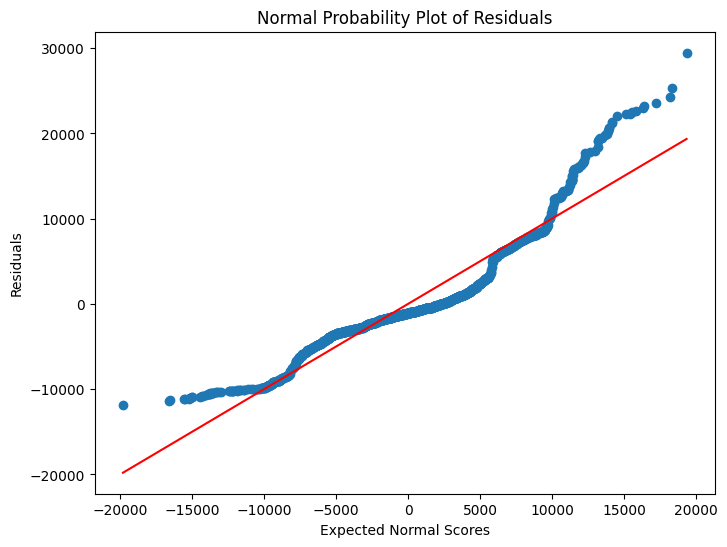

In [ ]:
x_p = np.arange(1.05*min(te_values.min(), -te_values.max()), 1.05*te_values.max(), 0.1)
y_p= t.pdf(x_p, df=X.shape[0] - X.shape[1])
#y_p2 = norm.pdf(x_p)



residual = y - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

# Setting the y-limits
plt.ylim(-30000,30000)

plt.title('Residual vs Predicted Value')
plt.show()


plt.scatter(te_values[(t_left<=te_values)& (te_values <= t_right)], t.pdf(te_values[(t_left<=te_values)& (te_values <= t_right)], df= X.shape[0]- X.shape[1]), color="g")

plt.scatter(te_values[(t_left > te_values) | (te_values > t_right)], t.pdf(te_values[(t_left > te_values) | (te_values > t_right)], df=X.shape[0] - X.shape[1]), color="r")



plt.plot(x_p, y_p, color='b')
plt.autoscale(axis='x', tight=True)
plt.ylim(bottom=-.005)
plt.ylabel("Probability")
plt.xlabel("t-values")
plt.title("Studentized errors for outlier detection")
plt.fill_between(x_p[x_p<t_left], t.pdf(x_p[x_p<t_left],df= X.shape[0]- X.shape[1]), -0.005, alpha=0.3, color='b')
plt.fill_between(x_p[x_p>t_right], t.pdf(x_p[x_p>t_right],df= X.shape[0]- X.shape[1]), -0.005, alpha=0.3, color='b')
plt.legend()
plt.show()




plt.figure(figsize=(8, 6))
plt.hist(residual, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Calculate the variance of residuals
variance = np.var(residual)

# Calculate the expected normal scores
expected_normal_scores = np.sort(np.random.normal(0, math.sqrt(variance), len(residual)))

# Sort the residuals
sorted_residuals = np.sort(residual)

# Plot the normal probability plot of the residuals
plt.figure(figsize=(8, 6))
plt.scatter(expected_normal_scores, sorted_residuals)
plt.plot(expected_normal_scores, expected_normal_scores, color='r')
plt.xlabel("Expected Normal Scores")
plt.ylabel("Residuals")
plt.title("Normal Probability Plot of Residuals")
plt.show()

Lasso model coefficients:
intercept: 0.0
age: 258.5452291520028
bmi: 340.23916542893625
sex_male: -107.08502692990875
smoker_yes: 23856.35680274375
region_northwest: -287.65288043996605
region_southeast: -1021.9369075024787
region_southwest: -899.748974352624


Ridge model coefficients:
intercept: 0.0
age: 258.479834441097
bmi: 340.21345571549193
sex_male: -104.52787094008765
smoker_yes: 23752.48911922975
region_northwest: -299.3629625612833
region_southeast: -1023.8328379504836
region_southwest: -909.5080599917593




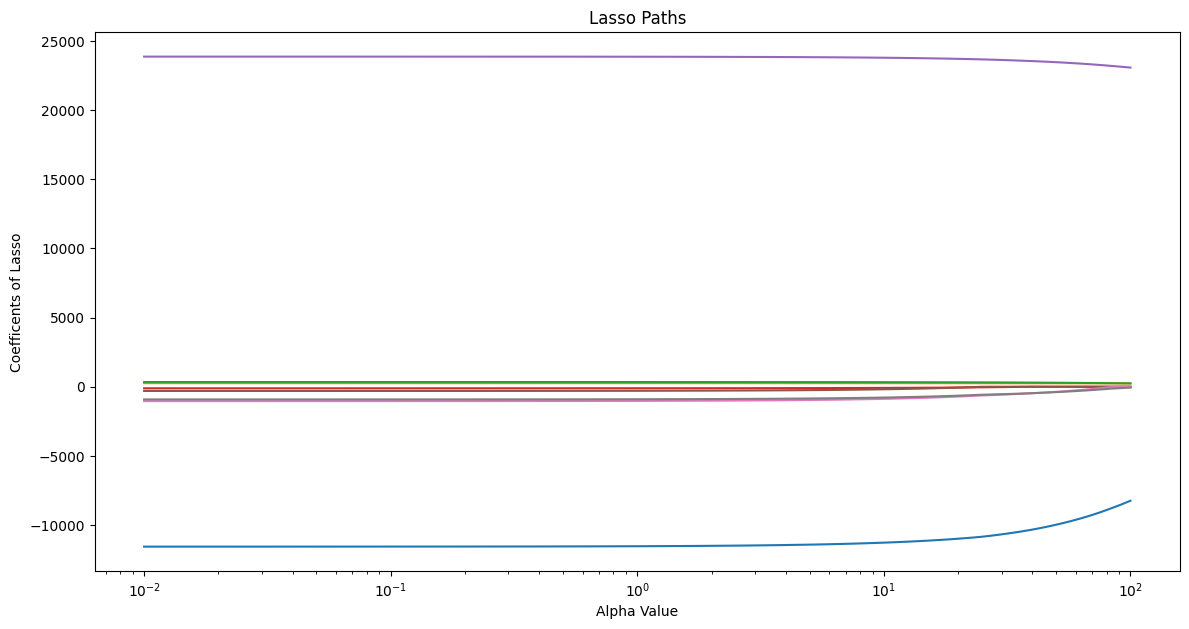

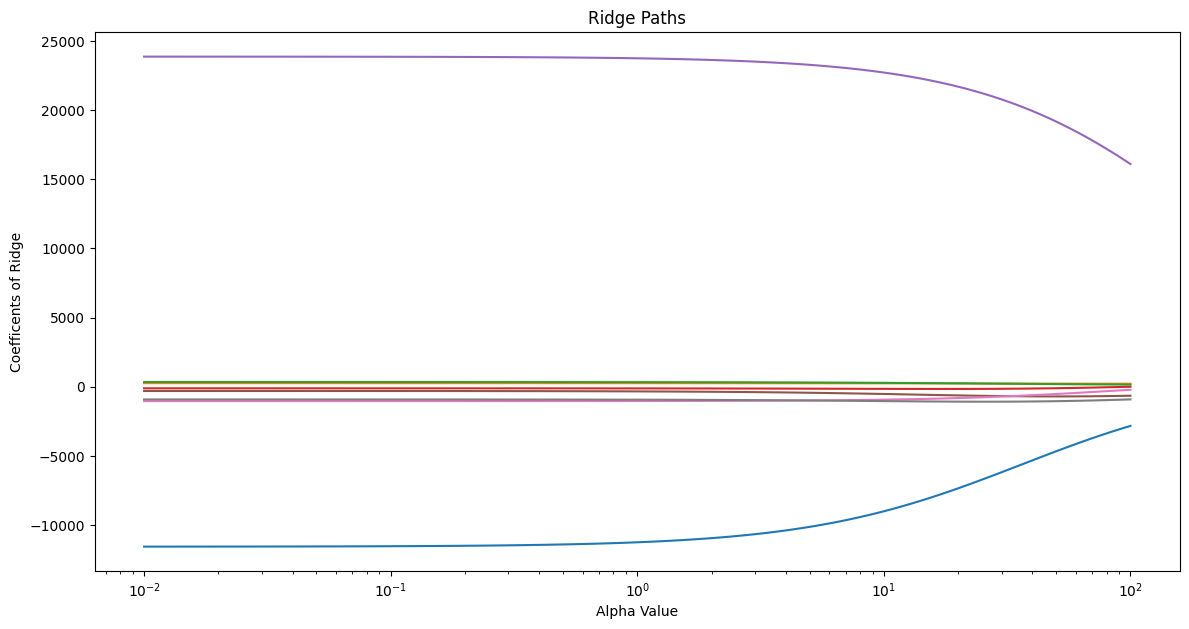

In [ ]:
data = pd.read_csv("final.csv")
# Creating dummy variables
dummy = pd.get_dummies(data[["sex", "smoker", "region"]], drop_first=True)

# Dropping original columns and adding dummy ones
data.drop(["sex", "smoker", "region"], axis=1, inplace=True)
data = pd.concat([data, dummy], axis=1)

# print(data)

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# We need to separate our predictors (X) and target/dependent variable (y)
X_new = data.drop("charges", axis=1).values
y_new = data["charges"].values

# You need to add a bias term (intercept) manually for sklearn linear models:
X_new = np.concatenate((np.ones((X_new.shape[0], 1)), X_new), axis=1)

# Define the models
Lasso_model = Lasso()
Ridge_model = Ridge()

# Train the models
Lasso_model.fit(X_new, y_new)
Ridge_model.fit(X_new, y_new)

# Outputting the coefficients from the Lasso model
print("Lasso model coefficients:")
for i, name in enumerate(['intercept'] + data.drop("charges", axis=1).columns.tolist()):
    print(f"{name}: {Lasso_model.coef_[i]}")

print("\n")

# Outputting the coefficients from the Ridge model
print("Ridge model coefficients:")
for i, name in enumerate(['intercept'] + data.drop("charges", axis=1).columns.tolist()):
    print(f"{name}: {Ridge_model.coef_[i]}")

print("\n")

# Generating a range of alpha values
alpha_values = np.logspace(-2, 2, 100)

# Initializing lists to hold the coefficients of the models for each alpha value
lasso_coeffs = []
ridge_coeffs = []

# For each alpha value in the list of alpha values
for alpha in alpha_values:
    # Create a Lasso model
    lasso = Lasso(alpha=alpha, fit_intercept=False)

    # Train the Lasso model
    lasso.fit(X_new, y_new)

    # Append the coefficients of the Lasso model to the list of Lasso coeffs.
    lasso_coeffs.append(lasso.coef_)

    # Create a Ridge model
    ridge = Ridge(alpha=alpha, fit_intercept=False)

    # Train the Ridge model
    ridge.fit(X_new, y_new)

    # Append the coefficients of the Ridge model to the list of Ridge coeffs.
    ridge_coeffs.append(ridge.coef_)

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(alpha_values, lasso_coeffs)
plt.xscale('log')
plt.title('Lasso Paths')
plt.xlabel('Alpha Value')
plt.ylabel('Coefficents of Lasso')
plt.axis('tight')
plt.show()

plt.figure(figsize=(14, 7))

plt.plot(alpha_values, ridge_coeffs)
plt.xscale('log')
plt.title('Ridge Paths')
plt.xlabel('Alpha Value')
plt.ylabel('Coefficents of Ridge')
plt.axis('tight')
plt.show()